___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" 
alt="CLRSWY"></p>

## <p style="background-color:#FDFEFE; font-family:newtimeroman; color:#9d4f8c; font-size:100%; text-align:center; border-radius:10px 10px;">WAY TO REINVENT YOURSELF</p>

<img src=https://i.ibb.co/wJW61Y2/Used-cars.jpg width="700" height="200">

## <p style="background-color:#FDFEFE; font-family:newtimeroman; color:#060108; font-size:200%; text-align:center; border-radius:10px 10px;">The Capstone Project of Data Analytics Module</p>

## <p style="background-color:#FDFEFE; font-family:newtimeroman; color:#060108; font-size:150%; text-align:center; border-radius:10px 10px;">Car Price Prediction EDA</p>

## Introduction
Welcome to "***AutoScout Data Analysis Project***". This is the capstone project of ***Data Analysis*** Module. **Auto Scout** data which using for this project, scraped from the on-line car trading company in 2019, contains many features of 9 different car models. In this project, you will have the opportunity to apply many commonly used algorithms for Data Cleaning and Exploratory Data Analysis by using many Python libraries such as Numpy, Pandas, Matplotlib, Seaborn, Scipy you will analyze clean dataset.

### Some Reminders on Exploratory data analysis (EDA)

Exploratory data analysis (EDA) is an especially important activity in the routine of a data analyst or scientist. It enables an in depth understanding of the dataset, define or discard hypotheses and create predictive models on a solid basis. It uses data manipulation techniques and several statistical tools to describe and understand the relationship between variables and how these can impact business. By means of EDA, we can obtain meaningful insights that can impact analysis under the following questions (If a checklist is good enough for pilots to use every flight, it’s good enough for data scientists to use with every dataset).
1. What question are you trying to solve (or prove wrong)?
2. What kind of data do you have?
3. What’s missing from the data?
4. Where are the outliers?
5. How can you add, change or remove features to get more out of your data?

**``Exploratory data analysis (EDA)``** is often an **iterative brainstorming process** where you pose a question, review the data, and develop further questions to investigate before beginning model development work. The image below shows how the brainstorming phase is connected with that of understanding the variables and how this in turn is connected again with the brainstorming phase.<br>

<img src=https://i.ibb.co/k0MC950/EDA-Process.png width="300" height="100">

[Image Credit: Andrew D.](https://towardsdatascience.com/exploratory-data-analysis-in-python-a-step-by-step-process-d0dfa6bf94ee)

**``In this context, the project consists of 3 parts in general:``**
* **The first part** is related to 'Data Cleaning'. It deals with Incorrect Headers, Incorrect Format, Anomalies, and Dropping useless columns.
* **The second part** is related to 'Filling Data', in other words 'Imputation'. It deals with Missing Values. Categorical to numeric transformation is done as well.
* **The third part** is related to 'Handling Outliers of Data' via Visualization libraries. So, some insights will be extracted.

**``NOTE:``**  However, you are free to create your own style. You do NOT have to stick to the steps above. We, the DA & DV instructors, recommend you study each part separately to create a source notebook for each part title for your further studies. 

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

plt.rcParams["figure.figsize"] = (10,6) #görsellerin boyutunu sabitler.

sns.set_style("whitegrid")
pd.set_option('display.float_format', lambda x: '%.3f' % x) #bütün float sayıları noktadan sonra 3 basamak 3 sayı göster.

# Set it None to display all rows in the dataframe
# pd.set_option('display.max_rows', None)

# Set it to None to display all columns in the dataframe
pd.options.display.max_rows = 100
pd.options.display.max_columns = 100

In [3]:
df=pd.read_json("scout_car.json", lines=True)

In [4]:
data = df.copy()

In [5]:
df.head()

,url,make_model,short_description,body_type,price,vat,km,registration,prev_owner,kW,hp,Type,Previous Owners,Next Inspection,Inspection new,Warranty,Full Service,Non-smoking Vehicle,null,Make,Model,Offer Number,First Registration,Body Color,Paint Type,Body Color Original,Upholstery,Body,Nr. of Doors,Nr. of Seats,Model Code,Gearing Type,Displacement,Cylinders,Weight,Drive chain,Fuel,Consumption,CO2 Emission,Emission Class,\nComfort & Convenience\n,\nEntertainment & Media\n,\nExtras\n,\nSafety & Security\n,description,Emission Label,Gears,Country version,Electricity consumption,Last Service Date,Other Fuel Types,Availability,Last Timing Belt Service Date,Available from
0,https://www.autoscout24.com//offers/audi-a1-sp...,Audi A1,Sportback 1.4 TDI S-tronic Xenon Navi Klima,Sedans,15770,VAT deductible,"56,013 km",01/2016,2 previous owners,nan,66 kW,"[, Used, , Diesel (Particulate Filter)]",\n2\n,"[\n06/2021\n, \n99 g CO2/km (comb)\n]","[\nYes\n, \nEuro 6\n]","[\n, \n, \n4 (Green)\n]","[\n, \n]","[\n, \n]",[],\nAudi\n,"[\n, A1, \n]",[\nLR-062483\n],"[\n, 2016, \n]","[\n, Black, \n]",[\nMetallic\n],[\nMythosschwarz\n],"[\nCloth, Black\n]","[\n, Sedans, \n]",[\n5\n],[\n5\n],[\n0588/BDF\n],"[\n, Automatic, \n]","[\n1,422 cc\n]",[\n3\n],"[\n1,220 kg\n]",[\nfront\n],"[\n, Diesel (Particulate Filter), \n]","[[3.8 l/100 km (comb)], [4.3 l/100 km (city)],...",[\n99 g CO2/km (comb)\n],[\nEuro 6\n],"[Air conditioning, Armrest, Automatic climate ...","[Bluetooth, Hands-free equipment, On-board com...","[Alloy wheels, Catalytic Converter, Voice Cont...","[ABS, Central door lock, Daytime running light...","[\n, Sicherheit:, , Deaktivierung für Beifahr...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,https://www.autoscout24.com//offers/audi-a1-1-...,Audi A1,1.8 TFSI sport,Sedans,14500,Price negotiable,"80,000 km",03/2017,None,nan,141 kW,"[, Used, , Gasoline]",NaN,NaN,NaN,NaN,NaN,NaN,[],\nAudi\n,"[\n, A1, \n]",NaN,"[\n, 2017, \n]","[\n, Red, \n]",NaN,NaN,"[\nCloth, Grey\n]","[\n, Sedans, \n]",[\n3\n],[\n4\n],[\n0588/BCY\n],"[\n, Automatic, \n]","[\n1,798 cc\n]",[\n4\n],"[\n1,255 kg\n]",[\nfront\n],"[\n, Gasoline, \n]","[[5.6 l/100 km (comb)], [7.1 l/100 km (city)],...",[\n129 g CO2/km (comb)\n],[\nEuro 6\n],"[Air conditioning, Automatic climate control, ...","[Bluetooth, Hands-free equipment, On-board com...","[Alloy wheels, Sport seats, Sport suspension, ...","[ABS, Central door lock, Central door lock wit...",[\nLangstreckenfahrzeug daher die hohe Kilomet...,[\n4 (Green)\n],[\n7\n],NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,https://www.autoscout24.com//offers/audi-a1-sp...,Audi A1,Sportback 1.6 TDI S tronic Einparkhilfe plus+m...,Sedans,14640,VAT deductible,"83,450 km",02/2016,1 previous owner,nan,85 kW,"[, Used, , Diesel (Particulate Filter)]",\n1\n,NaN,NaN,"[\n, \n, \n99 g CO2/km (comb)\n]",NaN,NaN,[],\nAudi\n,"[\n, A1, \n]",[\nAM-95365\n],"[\n, 2016, \n]","[\n, Black, \n]",[\nMetallic\n],[\nmythosschwarz metallic\n],"[\nCloth, Black\n]","[\n, Sedans, \n]",[\n4\n],[\n4\n],NaN,"[\n, Automatic, \n]","[\n1,598 cc\n]",NaN,NaN,[\nfront\n],"[\n, Diesel (Particulate Filter), \n]","[[3.8 l/100 km (comb)], [4.4 l/100 km (city)],...",[\n99 g CO2/km (comb)\n],[\nEuro 6\n],"[Air conditioning, Cruise control, Electrical ...","[MP3, On-board computer]","[Alloy wheels, Voice Control]","[ABS, Central door lock, Daytime running light...","[\n, Fahrzeug-Nummer: AM-95365, , Ehem. UPE 2...",[\n4 (Green)\n],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,https://www.autoscout24.com//offers/audi-a1-1-...,Audi A1,1.4 TDi Design S tronic,Sedans,14500,None,"73,000 km",08/2016,1 previous owner,nan,66 kW,"[, Used, , Diesel (Particulate Filter)]",\n1\n,NaN,NaN,NaN,"[\n, \n, \n99 g CO2/km (comb)\n]","[\n, \n, \nEuro 6\n]",[],\nAudi\n,"[\n, A1, \n]",NaN,"[\n, 2016, \n]","[\n, Brown, \n]",[\nMetallic\n],NaN,NaN,"[\n, Sedans, \n]",[\n3\n],[\n4\n],NaN,"[\n, Automatic, \n]","[\n1,422 cc\n]",[\n3\n],"[\n1,195 kg\n]",NaN,"[\n, Diesel (Particulate Filter), \n]","[[3.8 l/100 km (comb)], [4.3 l/100 km (city)],...",[

# PART- 1 `( Data Cleaning )`

In [6]:
df.head().T

,0,1,2,3,4
url,https://www.autoscout24.com//offers/audi-a1-sp...,https://www.autoscout24.com//offers/audi-a1-1-...,https://www.autoscout24.com//offers/audi-a1-sp...,https://www.autoscout24.com//offers/audi-a1-1-...,https://www.autoscout24.com//offers/audi-a1-sp...
make_model,Audi A1,Audi A1,Audi A1,Audi A1,Audi A1
short_description,Sportback 1.4 TDI S-tronic Xenon Navi Klima,1.8 TFSI sport,Sportback 1.6 TDI S tronic Einparkhilfe plus+m...,1.4 TDi Design S tronic,Sportback 1.4 TDI S-Tronic S-Line Ext. admired...
body_type,Sedans,Sedans,Sedans,Sedans,Sedans
price,15770,14500,14640,14500,16790
vat,VAT deductible,Price negotiable,VAT deductible,None,None
km,"56,013 km","80,000 km","83,450 km","73,000 km","16,200 km"
registration,01/2016,03/2017,02/2016,08/2016,05/2016
prev_owner,2 previous owners,None,1 previous owner,1 previous owner,1 previous owner
kW,NaN,NaN,NaN,NaN,NaN


In [7]:
df["Comfort Convenience"] = df["\nComfort & Convenience\n"]
df["Entertainment Media"] = df["\nEntertainment & Media\n"]
df["Extras"]=df["\nExtras\n"]
df["Safety Security"]=df["\nSafety & Security\n"]

In [8]:
df.head().T

,0,1,2,3,4
url,https://www.autoscout24.com//offers/audi-a1-sp...,https://www.autoscout24.com//offers/audi-a1-1-...,https://www.autoscout24.com//offers/audi-a1-sp...,https://www.autoscout24.com//offers/audi-a1-1-...,https://www.autoscout24.com//offers/audi-a1-sp...
make_model,Audi A1,Audi A1,Audi A1,Audi A1,Audi A1
short_description,Sportback 1.4 TDI S-tronic Xenon Navi Klima,1.8 TFSI sport,Sportback 1.6 TDI S tronic Einparkhilfe plus+m...,1.4 TDi Design S tronic,Sportback 1.4 TDI S-Tronic S-Line Ext. admired...
body_type,Sedans,Sedans,Sedans,Sedans,Sedans
price,15770,14500,14640,14500,16790
vat,VAT deductible,Price negotiable,VAT deductible,None,None
km,"56,013 km","80,000 km","83,450 km","73,000 km","16,200 km"
registration,01/2016,03/2017,02/2016,08/2016,05/2016
prev_owner,2 previous owners,None,1 previous owner,1 previous owner,1 previous owner
kW,NaN,NaN,NaN,NaN,NaN


In [9]:
drop_columns = ["\nComfort & Convenience\n","\nEntertainment & Media\n","\nExtras\n","\nSafety & Security\n"]
df.drop(drop_columns,axis=1,inplace=True)

In [10]:
df.head().T

,0,1,2,3,4
url,https://www.autoscout24.com//offers/audi-a1-sp...,https://www.autoscout24.com//offers/audi-a1-1-...,https://www.autoscout24.com//offers/audi-a1-sp...,https://www.autoscout24.com//offers/audi-a1-1-...,https://www.autoscout24.com//offers/audi-a1-sp...
make_model,Audi A1,Audi A1,Audi A1,Audi A1,Audi A1
short_description,Sportback 1.4 TDI S-tronic Xenon Navi Klima,1.8 TFSI sport,Sportback 1.6 TDI S tronic Einparkhilfe plus+m...,1.4 TDi Design S tronic,Sportback 1.4 TDI S-Tronic S-Line Ext. admired...
body_type,Sedans,Sedans,Sedans,Sedans,Sedans
price,15770,14500,14640,14500,16790
vat,VAT deductible,Price negotiable,VAT deductible,None,None
km,"56,013 km","80,000 km","83,450 km","73,000 km","16,200 km"
registration,01/2016,03/2017,02/2016,08/2016,05/2016
prev_owner,2 previous owners,None,1 previous owner,1 previous owner,1 previous owner
kW,NaN,NaN,NaN,NaN,NaN


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15919 entries, 0 to 15918
Data columns (total 54 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   url                            15919 non-null  object 
 1   make_model                     15919 non-null  object 
 2   short_description              15873 non-null  object 
 3   body_type                      15859 non-null  object 
 4   price                          15919 non-null  int64  
 5   vat                            11406 non-null  object 
 6   km                             15919 non-null  object 
 7   registration                   15919 non-null  object 
 8   prev_owner                     9091 non-null   object 
 9   kW                             0 non-null      float64
 10  hp                             15919 non-null  object 
 11  Type                           15917 non-null  object 
 12  Previous Owners                9279 non-null  

In [12]:
df.shape

(15919, 54)

In [13]:
df.isnull().sum()

url                                  0
make_model                           0
short_description                   46
body_type                           60
price                                0
vat                               4513
km                                   0
registration                         0
prev_owner                        6828
kW                               15919
hp                                   0
Type                                 2
Previous Owners                   6640
Next Inspection                  12384
Inspection new                   11987
Warranty                          5420
Full Service                      7704
Non-smoking Vehicle               8742
null                                 0
Make                                 0
Model                                0
Offer Number                      3175
First Registration                1597
Body Color                         597
Paint Type                        5772
Body Color Original      

In [14]:
df.isnull().sum()/len(df)*100

url                               0.000
make_model                        0.000
short_description                 0.289
body_type                         0.377
price                             0.000
vat                              28.350
km                                0.000
registration                      0.000
prev_owner                       42.892
kW                              100.000
hp                                0.000
Type                              0.013
Previous Owners                  41.711
Next Inspection                  77.794
Inspection new                   75.300
Warranty                         34.047
Full Service                     48.395
Non-smoking Vehicle              54.916
null                              0.000
Make                              0.000
Model                             0.000
Offer Number                     19.945
First Registration               10.032
Body Color                        3.750
Paint Type                       36.259


### Dropping columns with more than 85% missing values

In [15]:
null_percentage=df.isnull().sum()/len(df)*100

In [16]:
upper_null_85=null_percentage.loc[null_percentage>= 85]
upper_null_85

kW                              100.000
Electricity consumption          99.139
Last Service Date                96.445
Other Fuel Types                 94.472
Availability                     96.011
Last Timing Belt Service Date    99.899
Available from                   98.291
dtype: float64

In [17]:
upper_null_85.index

Index(['kW', 'Electricity consumption', 'Last Service Date',
       'Other Fuel Types', 'Availability', 'Last Timing Belt Service Date',
       'Available from'],
      dtype='object')

In [18]:
df.drop(upper_null_85.index,axis=1,inplace=True)

In [19]:
df.shape

(15919, 47)

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15919 entries, 0 to 15918
Data columns (total 47 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   url                  15919 non-null  object
 1   make_model           15919 non-null  object
 2   short_description    15873 non-null  object
 3   body_type            15859 non-null  object
 4   price                15919 non-null  int64 
 5   vat                  11406 non-null  object
 6   km                   15919 non-null  object
 7   registration         15919 non-null  object
 8   prev_owner           9091 non-null   object
 9   hp                   15919 non-null  object
 10  Type                 15917 non-null  object
 11  Previous Owners      9279 non-null   object
 12  Next Inspection      3535 non-null   object
 13  Inspection new       3932 non-null   object
 14  Warranty             10499 non-null  object
 15  Full Service         8215 non-null   object
 16  Non-

## url 

In [21]:
df.url.value_counts(dropna=False)

https://www.autoscout24.com//offers/audi-a3-spb-1-6-tdi-s-tronic-diesel-black-016c398b-712c-e774-e053-e250040a6076                                  1
https://www.autoscout24.com//offers/opel-astra-1-4-turbo-ecotec-direct-inj-innovation-star-gasoline-red-f2a63007-2574-4828-9390-9c6fb5f702b7        1
https://www.autoscout24.com//offers/renault-espace-dci-160-initiale-paris-energy-tt-edc-118-kw-diesel-brown-2b329182-9c59-456d-a7b9-bd03a1b8f67e    1
https://www.autoscout24.com//offers/opel-corsa-1-2-70-ps-dynamic-klima-tempomat-16-gasoline-blue-d3dfc15a-a693-42dd-b2ad-b7f22b1c612f               1
https://www.autoscout24.com//offers/opel-corsa-1-2b-navigatie-touch-screen-all-season-tyre-bl-gasoline-blue-99f81689-0846-445e-af9c-9158d53f84cc    1
                                                                                                                                                   ..
https://www.autoscout24.com//offers/audi-a3-sportback-30-tdi-s-tronic-sport-diesel-white-6f153868-e5

In [22]:
df.drop("url",axis=1,inplace=True)

## make_model

In [23]:
df.make_model.value_counts(dropna=False)

Audi A3           3097
Audi A1           2614
Opel Insignia     2598
Opel Astra        2526
Opel Corsa        2219
Renault Clio      1839
Renault Espace     991
Renault Duster      34
Audi A2              1
Name: make_model, dtype: int64

## short_description

In [24]:
df.short_description.value_counts(dropna=False)

SPB 1.6 TDI 116 CV S tronic Sport              64
NaN                                            46
1.4 66kW (90CV) Selective                      40
MOVE KLIMA CD USB ALLWETTER BLUETOOTH          38
SPB 30 TDI S tronic Business                   35
                                               ..
1.4 Turbo ON+Navi+Kamera+AGR+Allwetterreif      1
1.6 (CDTI) Euro 6* LED *Keyless *Xenon*Navi     1
ST 1,6 AUTOMATIK, NAVI, WINTER-P.               1
Selection E *15.000 km+Bluetooth+Klima+BC*      1
K Lim. 1.4 Turbo Automatik Edition              1
Name: short_description, Length: 10002, dtype: int64

In [25]:
df.drop("short_description",axis=1,inplace=True)

## body_type

In [26]:
df.body_type.value_counts(dropna=False)

Sedans           7903
Station wagon    3553
Compact          3153
Van               783
Other             290
Transporter        88
NaN                60
Off-Road           56
Coupe              25
Convertible         8
Name: body_type, dtype: int64

## price (target)

In [27]:
df.price.value_counts(dropna=False)

14990    154
15990    151
10990    139
15900    106
17990    102
        ... 
48490      1
36180      1
40745      1
9545       1
34815      1
Name: price, Length: 2956, dtype: int64

In [28]:
df.price.isnull().sum()

0

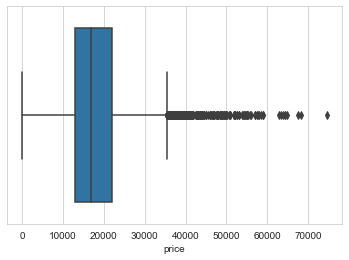

In [29]:
sns.boxplot(df.price);

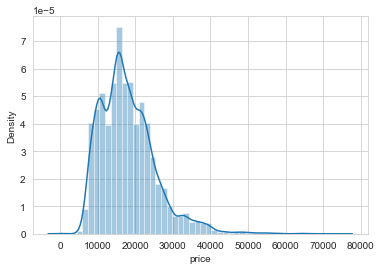

In [30]:
sns.distplot(df.price);

## vat

In [31]:
df.vat.value_counts(dropna=False)

VAT deductible      10980
NaN                  4513
Price negotiable      426
Name: vat, dtype: int64

## km

In [32]:
df.km.value_counts(dropna=False)

10 km        1045
- km         1024
1 km          367
5 km          170
50 km         148
             ... 
38,938 km       1
77,050 km       1
45,920 km       1
15,414 km       1
27,396 km       1
Name: km, Length: 6690, dtype: int64

In [33]:
df.km.str.replace(",","").str.rstrip(" km")

0        56013
1        80000
2        83450
3        73000
4        16200
         ...  
15914        -
15915     9900
15916       15
15917       10
15918        -
Name: km, Length: 15919, dtype: object

In [34]:
df["km"] = df.km.str.replace(",","").str.rstrip(" km")

In [35]:
df["km"] = df.km.replace("-",np.nan)

In [36]:
df["km"] = df.km.astype("float")

In [37]:
df.km.value_counts(dropna=False)

10.000       1045
nan          1024
1.000         367
5.000         170
50.000        148
             ... 
8329.000        1
267.000         1
1060.000        1
73652.000       1
49320.000       1
Name: km, Length: 6690, dtype: int64

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15919 entries, 0 to 15918
Data columns (total 45 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   make_model           15919 non-null  object 
 1   body_type            15859 non-null  object 
 2   price                15919 non-null  int64  
 3   vat                  11406 non-null  object 
 4   km                   14895 non-null  float64
 5   registration         15919 non-null  object 
 6   prev_owner           9091 non-null   object 
 7   hp                   15919 non-null  object 
 8   Type                 15917 non-null  object 
 9   Previous Owners      9279 non-null   object 
 10  Next Inspection      3535 non-null   object 
 11  Inspection new       3932 non-null   object 
 12  Warranty             10499 non-null  object 
 13  Full Service         8215 non-null   object 
 14  Non-smoking Vehicle  7177 non-null   object 
 15  null                 15919 non-null 

In [39]:
df.km.isnull().sum()

1024

## registration

In [40]:
df.registration.value_counts(dropna=False)

-/-        1597
03/2018     695
02/2019     585
05/2018     572
03/2019     543
01/2019     541
04/2018     541
02/2018     539
03/2016     536
06/2018     532
04/2016     532
01/2018     511
04/2019     506
02/2016     472
03/2017     471
05/2016     459
06/2016     452
05/2019     440
06/2017     409
05/2017     404
07/2018     396
04/2017     380
01/2016     376
02/2017     368
01/2017     306
08/2018     285
06/2019     224
07/2017     215
11/2017     180
07/2016     176
10/2016     160
10/2017     154
09/2017     149
11/2016     142
09/2016     141
09/2018     141
12/2016     134
12/2017     123
08/2017     114
11/2018     110
12/2018     103
10/2018      97
08/2016      94
07/2019       6
09/2019       5
12/2019       1
08/2019       1
11/2019       1
Name: registration, dtype: int64

In [41]:
df["First Registration"].value_counts(dropna=False)

TypeError: unhashable type: 'list'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas\_libs\hashtable_class_helper.pxi", line 1709, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


[\n, 2018, \n]    4522
[\n, 2016, \n]    3674
[\n, 2017, \n]    3273
[\n, 2019, \n]    2853
NaN               1597
Name: First Registration, dtype: int64

*Since the month is not important in the vehicle model year review, the registration will be droped and the first registration will be continued.*

In [42]:
df.drop("registration",axis=1,inplace=True)

## prev_owner & Previous Owners

In [43]:
df.prev_owner.value_counts(dropna=False)

1 previous owner     8294
NaN                  6828
2 previous owners     778
3 previous owners      17
4 previous owners       2
Name: prev_owner, dtype: int64

In [44]:
 df["Previous Owners"].value_counts(dropna=False)

TypeError: unhashable type: 'list'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas\_libs\hashtable_class_helper.pxi", line 1709, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


\n1\n                                                                                        8101
NaN                                                                                          6640
\n2\n                                                                                         766
\n0\n                                                                                         163
\n3\n                                                                                          17
                                                                                             ... 
[\n1\n, \n181 g CO2/km (comb)\n]                                                                1
[\n1\n, \n, 6.1 l/100 km (comb), \n, 7.7 l/100 km (city), \n, 5.2 l/100 km (country), \n]       1
[\n1\n, \nEuro 6\n]                                                                             1
[\n1\n, \n, 5.9 l/100 km (comb), \n, 7.6 l/100 km (city), \n, 4.9 l/100 km (country), \n]       1
[\n1\n, \n102 g CO2/

In [45]:
[item[0] if type(item) == list else item for item in df["Previous Owners"]]

['\n2\n',
 nan,
 '\n1\n',
 '\n1\n',
 '\n1\n',
 '\n1\n',
 '\n1\n',
 '\n1\n',
 '\n1\n',
 nan,
 nan,
 '\n1\n',
 '\n1\n',
 nan,
 '\n1\n',
 '\n1\n',
 nan,
 '\n1\n',
 nan,
 nan,
 '\n1\n',
 '\n1\n',
 '\n1\n',
 nan,
 '\n1\n',
 nan,
 '\n1\n',
 '\n1\n',
 nan,
 nan,
 nan,
 '\n1\n',
 '\n1\n',
 '\n1\n',
 nan,
 '\n1\n',
 '\n1\n',
 '\n1\n',
 '\n2\n',
 '\n1\n',
 '\n1\n',
 '\n1\n',
 '\n1\n',
 '\n1\n',
 '\n1\n',
 '\n1\n',
 '\n1\n',
 '\n0\n',
 '\n2\n',
 '\n1\n',
 '\n1\n',
 '\n1\n',
 nan,
 nan,
 '\n1\n',
 '\n1\n',
 '\n1\n',
 '\n1\n',
 '\n2\n',
 nan,
 '\n1\n',
 '\n1\n',
 '\n1\n',
 '\n1\n',
 '\n1\n',
 nan,
 nan,
 nan,
 '\n1\n',
 '\n1\n',
 nan,
 '\n1\n',
 '\n1\n',
 '\n1\n',
 '\n1\n',
 '\n1\n',
 '\n1\n',
 '\n1\n',
 '\n1\n',
 '\n1\n',
 '\n1\n',
 nan,
 '\n1\n',
 '\n1\n',
 '\n2\n',
 nan,
 nan,
 '\n1\n',
 '\n1\n',
 '\n1\n',
 '\n1\n',
 '\n1\n',
 '\n2\n',
 '\n1\n',
 nan,
 nan,
 nan,
 nan,
 '\n1\n',
 '\n1\n',
 nan,
 nan,
 '\n1\n',
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 '\n1\n',
 nan,
 nan

In [46]:
df["Previous_Owners"] = [item[0] if type(item) == list else item for item in df["Previous Owners"]]
df["Previous_Owners"]

0        \n2\n
1          NaN
2        \n1\n
3        \n1\n
4        \n1\n
         ...  
15914      NaN
15915    \n1\n
15916    \n1\n
15917      NaN
15918    \n1\n
Name: Previous_Owners, Length: 15919, dtype: object

In [47]:
df["Previous_Owners"] = df["Previous_Owners"].str.strip("\n").astype('float')

In [48]:
df["Previous_Owners"].value_counts(dropna=False)

1.000    8294
nan      6640
2.000     778
0.000     188
3.000      17
4.000       2
Name: Previous_Owners, dtype: int64

In [49]:
df.drop(["prev_owner", "Previous Owners"], axis=1, inplace=True)

In [50]:
type(df["Previous_Owners"][0])

numpy.float64

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15919 entries, 0 to 15918
Data columns (total 43 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   make_model           15919 non-null  object 
 1   body_type            15859 non-null  object 
 2   price                15919 non-null  int64  
 3   vat                  11406 non-null  object 
 4   km                   14895 non-null  float64
 5   hp                   15919 non-null  object 
 6   Type                 15917 non-null  object 
 7   Next Inspection      3535 non-null   object 
 8   Inspection new       3932 non-null   object 
 9   Warranty             10499 non-null  object 
 10  Full Service         8215 non-null   object 
 11  Non-smoking Vehicle  7177 non-null   object 
 12  null                 15919 non-null  object 
 13  Make                 15919 non-null  object 
 14  Model                15919 non-null  object 
 15  Offer Number         12744 non-null 

## hp

In [52]:
df.hp.value_counts(dropna=False)

85 kW     2542
66 kW     2122
81 kW     1402
100 kW    1308
110 kW    1112
70 kW      888
125 kW     707
51 kW      695
55 kW      569
118 kW     516
92 kW      466
121 kW     392
147 kW     380
77 kW      345
56 kW      286
54 kW      276
103 kW     253
87 kW      232
165 kW     194
88 kW      177
60 kW      160
162 kW      98
- kW        88
74 kW       81
96 kW       72
71 kW       59
101 kW      47
67 kW       40
154 kW      39
122 kW      35
119 kW      30
164 kW      27
135 kW      24
82 kW       22
52 kW       22
1 kW        20
78 kW       20
294 kW      18
146 kW      18
141 kW      16
57 kW       10
120 kW       8
104 kW       8
191 kW       7
112 kW       7
117 kW       6
155 kW       6
184 kW       5
65 kW        4
90 kW        4
76 kW        4
149 kW       3
168 kW       3
98 kW        3
93 kW        3
80 kW        3
140 kW       2
150 kW       2
270 kW       2
167 kW       2
89 kW        2
86 kW        2
40 kW        2
143 kW       2
63 kW        2
53 kW        2
228 kW    

In [53]:
df["hp_kW"] = df.hp.str.rstrip(" kW")

In [54]:
df["hp_kW"] = df.hp_kW.replace("-",np.nan)

In [55]:
df["hp_kW"]= df.hp_kW.astype("float")

In [56]:
df.hp_kW.value_counts(dropna=False)

85.000     2542
66.000     2122
81.000     1402
100.000    1308
110.000    1112
70.000      888
125.000     707
51.000      695
55.000      569
118.000     516
92.000      466
121.000     392
147.000     380
77.000      345
56.000      286
54.000      276
103.000     253
87.000      232
165.000     194
88.000      177
60.000      160
162.000      98
nan          88
74.000       81
96.000       72
71.000       59
101.000      47
67.000       40
154.000      39
122.000      35
119.000      30
164.000      27
135.000      24
82.000       22
52.000       22
1.000        20
78.000       20
294.000      18
146.000      18
141.000      16
57.000       10
104.000       8
120.000       8
112.000       7
191.000       7
117.000       6
155.000       6
184.000       5
65.000        4
90.000        4
76.000        4
98.000        3
168.000       3
93.000        3
149.000       3
80.000        3
140.000       2
270.000       2
86.000        2
40.000        2
150.000       2
89.000        2
53.000  

In [57]:
df.drop("hp",axis=1,inplace=True)

## Type 

In [58]:
df.Type.value_counts(dropna=False)

TypeError: unhashable type: 'list'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas\_libs\hashtable_class_helper.pxi", line 1709, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


[, Used, , Diesel (Particulate Filter)]                                                                                  3475
[, Used, , Diesel]                                                                                                       2516
[, Used, , Gasoline]                                                                                                     2367
[, Used, , Super 95]                                                                                                     1818
[, Pre-registered, , Super 95]                                                                                            500
                                                                                                                         ... 
[, Used, , Regular/Benzine E10 91 / Super E10 95 / Super Plus E10 98 / Super Plus 98 / Super 95 / Regular/Benzine 91]       1
[, Used, , Regular/Benzine E10 91 / Regular/Benzine 91 / Super 95 / Super Plus 98 / Super E10 95 / Super Plus E10 98] 

In [59]:
df.Type.str[1].value_counts(dropna=False)

Used              11096
New                1650
Pre-registered     1364
Employee's car     1011
Demonstration       796
NaN                   2
Name: Type, dtype: int64

In [60]:
df.Type = df.Type.str[1]

In [61]:
df.Type.value_counts(dropna=False)

Used              11096
New                1650
Pre-registered     1364
Employee's car     1011
Demonstration       796
NaN                   2
Name: Type, dtype: int64

## Next Inspection & Inspection new

In [62]:
df["Next Inspection"].value_counts(dropna=False)

TypeError: unhashable type: 'list'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas\_libs\hashtable_class_helper.pxi", line 1709, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


NaN                                                   12384
\n04/2022\n                                              62
\n03/2021\n                                              38
\n03/2022\n                                              36
\n06/2021\n                                              34
                                                      ...  
[\n03/2020\n, \n150 g CO2/km (comb)\n]                    1
[\n04/2021\n, \n, 5.4 l/100 km (comb), \n, \n, \n]        1
[\n03/2021\n, \n94 g CO2/km (comb)\n]                     1
[\n03/2020\n, \n122 g CO2/km (comb)\n]                    1
[\n05/2021\n, \n116 g CO2/km (comb)\n]                    1
Name: Next Inspection, Length: 1400, dtype: int64

In [63]:
df["Inspection new"].value_counts(dropna=False)

TypeError: unhashable type: 'list'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas\_libs\hashtable_class_helper.pxi", line 1709, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


NaN                                                                                            11987
[\nYes\n, \nEuro 6\n]                                                                            523
\nYes\n                                                                                          362
[\nYes\n, \n102 g CO2/km (comb)\n]                                                               174
[\nYes\n, \n4 (Green)\n]                                                                         166
                                                                                               ...  
[\nYes\n, \n1 (No sticker)\n]                                                                      1
[\nYes\n, \n, 5.2 l/100 km (comb), \n, 6.6 l/100 km (city), \n, 4.3 l/100 km (country), \n]        1
[\nYes\n, \n, 5.7 l/100 km (comb), \n, 7.3 l/100 km (city), \n, 4.9 l/100 km (country), \n]        1
[\nYes\n, \n, 5.2 l/100 km (comb), \n, 6.8 l/100 km (city), \n, 4.3 l/100 km (country), \n]

In [64]:
df["Inspection_new"] = [item[0] if type(item) == list else item for item in df["Inspection new"]]
df["Inspection_new"] = df["Inspection_new"].str.strip("\n")

In [65]:
df["Inspection_new"].value_counts(dropna=False)

NaN    11987
Yes     3932
Name: Inspection_new, dtype: int64

In [66]:
df.drop(["Inspection new","Next Inspection"],axis=1,inplace=True)

X has been dropped since it was deemed appropriate to use the audit criteria instead of the month information for the audit.

## Warranty 

In [67]:
df.Warranty.value_counts(dropna=False)

TypeError: unhashable type: 'list'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas\_libs\hashtable_class_helper.pxi", line 1709, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


NaN                                         5420
[\n, \n, \nEuro 6\n]                        1868
\n12 months\n                               1177
\n                                           979
\n24 months\n                                566
                                            ... 
[\n, \n, \n144 g CO2/km (comb)\n]              1
[\n47 months\n, \n4 (Green)\n]                 1
[\n6 months\n, \n109 g CO2/km (comb)\n]        1
[\n46 months\n, \n4 (Green)\n]                 1
[\n16 months\n, \n116 g CO2/km (comb)\n]       1
Name: Warranty, Length: 516, dtype: int64

In [68]:
df.drop("Warranty",axis=1,inplace=True)

During the modeling phase, it was understood that there was too much variety in the Warranty column, so it could not be included in the modeling and the column was dropped.

## Full Service

In [69]:
df["Full Service"].value_counts(dropna=False)

TypeError: unhashable type: 'list'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas\_libs\hashtable_class_helper.pxi", line 1709, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


NaN                                                                                           7704
[\n, \n, \n4 (Green)\n]                                                                       2235
[\n, \n, \nEuro 6\n]                                                                          2097
[\n, \n]                                                                                      1702
[\n, \n, \nEuro 6d-TEMP\n]                                                                     399
                                                                                              ... 
[\n, \n, \n, 6.2 l/100 km (comb), \n, 7.7 l/100 km (city), \n, 5.4 l/100 km (country), \n]       1
[\n, \n, \n, 6 l/100 km (comb), \n, 7.5 l/100 km (city), \n, 5.2 l/100 km (country), \n]         1
[\n, \n, \n, 5.7 l/100 km (comb), \n, 7.3 l/100 km (city), \n, 4.9 l/100 km (country), \n]       1
[\n, \n, \n, 5 l/100 km (comb), \n, 5.9 l/100 km (city), \n, 4.5 l/100 km (country), \n]         1
[\n, \n, \

In [70]:
df.drop("Full Service",axis=1,inplace=True)

## Non-smoking Vehicle 

In [71]:
df["Non-smoking Vehicle"].value_counts(dropna=False)

TypeError: unhashable type: 'list'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas\_libs\hashtable_class_helper.pxi", line 1709, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


NaN                                                                                           8742
[\n, \n]                                                                                      3647
[\n, \n, \n4 (Green)\n]                                                                       1240
[\n, \n, \nEuro 6\n]                                                                          1127
[\n, \n, \nEuro 6d-TEMP\n]                                                                     345
\n                                                                                              70
[\n, \n, \n120 g CO2/km (comb)\n]                                                               63
[\n, \n, \n85 g CO2/km (comb)\n]                                                                46
[\n, \n, \n107 g CO2/km (comb)\n]                                                               36
[\n, \n, \n104 g CO2/km (comb)\n]                                                               36
[\n, \n, \

In [72]:
df.drop("Non-smoking Vehicle",axis=1,inplace=True)

## null

In [73]:
df.drop("null",axis=1,inplace=True)

## Make

In [74]:
df.Make.value_counts(dropna=False)

\nOpel\n       7343
\nAudi\n       5712
\nRenault\n    2864
Name: Make, dtype: int64

In [75]:
df.drop("Make",axis=1,inplace=True)

The make column was dropped because the make_model column contains data.

## Model 

In [76]:
df.Model.value_counts(dropna=False)

TypeError: unhashable type: 'list'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas\_libs\hashtable_class_helper.pxi", line 1709, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


[\n, A3, \n]          3097
[\n, A1, \n]          2614
[\n, Insignia, \n]    2598
[\n, Astra, \n]       2526
[\n, Corsa, \n]       2219
[\n, Clio, \n]        1839
[\n, Espace, \n]       991
[\n, Duster, \n]        34
[\n, A2, \n]             1
Name: Model, dtype: int64

In [77]:
df.drop("Model",axis=1,inplace=True)

The model column was dropped because the make_model column contains data.

## Offer Number 

In [78]:
df["Offer Number"].value_counts(dropna=False)

TypeError: unhashable type: 'list'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas\_libs\hashtable_class_helper.pxi", line 1709, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


NaN                       3175
[\nXJ38068\n]               27
[\nHM53619\n]               27
[\nLT67679\n]               27
[\nJV03654\n]               27
                          ... 
[\nE84_474_6130_158\n]       1
[\n101\n]                    1
[\n418394\n]                 1
[\nrv290009\n]               1
[\nG02394\n]                 1
Name: Offer Number, Length: 11441, dtype: int64

In [79]:
df.drop("Offer Number",axis=1,inplace=True)

## First Registration 

In [80]:
df["First Registration"].value_counts(dropna=False)

TypeError: unhashable type: 'list'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas\_libs\hashtable_class_helper.pxi", line 1709, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


[\n, 2018, \n]    4522
[\n, 2016, \n]    3674
[\n, 2017, \n]    3273
[\n, 2019, \n]    2853
NaN               1597
Name: First Registration, dtype: int64

In [81]:
df["First Registration"].str[1].value_counts(dropna=False)

2018    4522
2016    3674
2017    3273
2019    2853
NaN     1597
Name: First Registration, dtype: int64

In [82]:
df["First Registration"] =df["First Registration"].str[1].astype("float")

In [83]:
df["Age"]= 2019 - df["First Registration"]

In [84]:
df["Age"].value_counts(dropna=False)

1.000    4522
3.000    3674
2.000    3273
0.000    2853
nan      1597
Name: Age, dtype: int64

In [85]:
df.drop("First Registration",axis=1,inplace=True)

## Body Color 

In [86]:
df["Body Color"].value_counts(dropna=False)

TypeError: unhashable type: 'list'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas\_libs\hashtable_class_helper.pxi", line 1709, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


[\n, Black, \n]     3745
[\n, Grey, \n]      3505
[\n, White, \n]     3406
[\n, Silver, \n]    1647
[\n, Blue, \n]      1431
[\n, Red, \n]        957
NaN                  597
[\n, Brown, \n]      289
[\n, Green, \n]      154
[\n, Beige, \n]      108
[\n, Yellow, \n]      51
[\n, Violet, \n]      18
[\n, Bronze, \n]       6
[\n, Orange, \n]       3
[\n, Gold, \n]         2
Name: Body Color, dtype: int64

In [87]:
df.drop("Body Color",axis=1,inplace=True)

## Paint Type

In [88]:
df["Paint Type"].value_counts(dropna=False)

TypeError: unhashable type: 'list'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas\_libs\hashtable_class_helper.pxi", line 1709, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


[\nMetallic\n]       9794
NaN                  5772
[\nUni/basic\n]       347
[\nPerl effect\n]       6
Name: Paint Type, dtype: int64

In [89]:
df["Paint Type"].str[0].str.strip("\n").value_counts(dropna=False)

Metallic       9794
NaN            5772
Uni/basic       347
Perl effect       6
Name: Paint Type, dtype: int64

In [90]:
df["Paint_Type"] = df["Paint Type"].str[0].str.strip("\n")

In [91]:
df["Paint_Type"].value_counts(dropna=False)

Metallic       9794
NaN            5772
Uni/basic       347
Perl effect       6
Name: Paint_Type, dtype: int64

In [92]:
df.drop("Paint Type",axis=1,inplace=True)

## Body Color Original 

In [93]:
df["Body Color Original"].value_counts(dropna=False)

TypeError: unhashable type: 'list'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas\_libs\hashtable_class_helper.pxi", line 1709, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


NaN                             3759
[\nOnyx Schwarz\n]               338
[\nBianco\n]                     282
[\nMythosschwarz Metallic\n]     238
[\nBrillantschwarz\n]            216
                                ... 
[\nBianca - Tetto Nero\n]          1
[\ndezir rot\n]                    1
[\nnero/tetto argento met\n]       1
[\nPython Yellow Metallic\n]       1
[\nkarbongrau\n]                   1
Name: Body Color Original, Length: 1928, dtype: int64

In [94]:
df.drop("Body Color Original",axis=1,inplace=True)

## Upholstery 

In [95]:
df["Upholstery"].value_counts(dropna=False)

TypeError: unhashable type: 'list'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas\_libs\hashtable_class_helper.pxi", line 1709, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


[\nCloth, Black\n]           5821
NaN                          3720
[\nPart leather, Black\n]    1121
[\nCloth\n]                  1005
[\nCloth, Grey\n]             891
[\nCloth, Other\n]            639
[\nFull leather, Black\n]     575
[\nBlack\n]                   491
[\nGrey\n]                    273
[\nOther, Other\n]            182
[\nPart leather\n]            140
[\nFull leather\n]            139
[\nFull leather, Brown\n]     116
[\nPart leather, Grey\n]      116
[\nOther, Black\n]            110
[\nFull leather, Other\n]      72
[\nFull leather, Grey\n]       67
[\nPart leather, Other\n]      65
[\nOther\n]                    56
[\nPart leather, Brown\n]      50
[\nalcantara, Black\n]         47
[\nVelour, Black\n]            36
[\nFull leather, Beige\n]      36
[\nCloth, Brown\n]             28
[\nVelour\n]                   16
[\nOther, Grey\n]              15
[\nCloth, Beige\n]             13
[\nCloth, Blue\n]              12
[\nBrown\n]                    12
[\nVelour, Gre

In [96]:
df["Upholstery"] = [item[0] if type(item) == list else item for item in df.Upholstery]

In [97]:
df["Upholstery"].value_counts(dropna=False)

\nCloth, Black\n           5821
NaN                        3720
\nPart leather, Black\n    1121
\nCloth\n                  1005
\nCloth, Grey\n             891
\nCloth, Other\n            639
\nFull leather, Black\n     575
\nBlack\n                   491
\nGrey\n                    273
\nOther, Other\n            182
\nPart leather\n            140
\nFull leather\n            139
\nPart leather, Grey\n      116
\nFull leather, Brown\n     116
\nOther, Black\n            110
\nFull leather, Other\n      72
\nFull leather, Grey\n       67
\nPart leather, Other\n      65
\nOther\n                    56
\nPart leather, Brown\n      50
\nalcantara, Black\n         47
\nFull leather, Beige\n      36
\nVelour, Black\n            36
\nCloth, Brown\n             28
\nVelour\n                   16
\nOther, Grey\n              15
\nCloth, Beige\n             13
\nBrown\n                    12
\nCloth, Blue\n              12
\nVelour, Grey\n              8
\nCloth, White\n              8
\nalcant

In [98]:
df["Upholstery"] = df.Upholstery.str.strip("\n").str.split(", ")

In [99]:
upholstery_type = ["Cloth", 'Part leather', 'Full leather', 'Velour', 'alcantara']
df["Upholstery_type"] = df["Upholstery"].apply(lambda x : x[0] if type(x) == list and x[0] in upholstery_type else np.nan)

In [100]:
df["Upholstery_type"].value_counts(dropna=False)

Cloth           8423
NaN             4871
Part leather    1499
Full leather    1009
Velour            60
alcantara         57
Name: Upholstery_type, dtype: int64

In [101]:
df.drop("Upholstery",axis=1,inplace=True)

## Body

In [102]:
df.Body.value_counts(dropna=False)

TypeError: unhashable type: 'list'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas\_libs\hashtable_class_helper.pxi", line 1709, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


[\n, Sedans, \n]           7903
[\n, Station wagon, \n]    3553
[\n, Compact, \n]          3153
[\n, Van, \n]               783
[\n, Other, \n]             290
[\n, Transporter, \n]        88
NaN                          60
[\n, Off-Road, \n]           56
[\n, Coupe, \n]              25
[\n, Convertible, \n]         8
Name: Body, dtype: int64

In [103]:
df.drop("Body",axis=1,inplace=True)

## Nr. of Doors 

In [104]:
df["Nr. of Doors"].value_counts(dropna=False)

TypeError: unhashable type: 'list'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas\_libs\hashtable_class_helper.pxi", line 1709, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


[\n5\n]    11575
[\n4\n]     3079
[\n3\n]      832
[\n2\n]      219
NaN          212
[\n7\n]        1
[\n1\n]        1
Name: Nr. of Doors, dtype: int64

In [105]:
df["Nr. of Doors"].str[0].str.strip("\n")

0        5
1        3
2        4
3        3
4        5
        ..
15914    5
15915    5
15916    5
15917    5
15918    5
Name: Nr. of Doors, Length: 15919, dtype: object

In [106]:
df["Nr_of_Doors"] = df["Nr. of Doors"].str[0].str.strip("\n").astype("float")

In [107]:
df["Nr_of_Doors"].value_counts(dropna=False)

5.000    11575
4.000     3079
3.000      832
2.000      219
nan        212
7.000        1
1.000        1
Name: Nr_of_Doors, dtype: int64

In [108]:
df.drop("Nr. of Doors",axis=1,inplace=True)

## Nr. of Seats 

In [109]:
df["Nr. of Seats"].value_counts(dropna=False)

TypeError: unhashable type: 'list'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas\_libs\hashtable_class_helper.pxi", line 1709, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


[\n5\n]    13336
[\n4\n]     1125
NaN          977
[\n7\n]      362
[\n2\n]      116
[\n6\n]        2
[\n3\n]        1
Name: Nr. of Seats, dtype: int64

In [110]:
df["Nr_of_Seats"] = df["Nr. of Seats"].str[0].str.strip("\n").astype("float")

In [111]:
df["Nr_of_Seats"].value_counts(dropna=False)

5.000    13336
4.000     1125
nan        977
7.000      362
2.000      116
6.000        2
3.000        1
Name: Nr_of_Seats, dtype: int64

In [112]:
df.drop("Nr. of Seats",axis=1,inplace=True)

## Model Code

In [113]:
df["Model Code"].value_counts(dropna=False)

TypeError: unhashable type: 'list'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas\_libs\hashtable_class_helper.pxi", line 1709, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


NaN               10941
[\n0035/BCB\n]      268
[\n0588/BNO\n]      245
[\n0588/BDB\n]      206
[\n0588/BHX\n]      188
                  ...  
[\n1844/AEN\n]        1
[\n0588/AVR\n]        1
[\n0035/AFF\n]        1
[\n1844/AFM\n]        1
[\n0035/AVN\n]        1
Name: Model Code, Length: 233, dtype: int64

In [114]:
df.drop("Model Code",axis=1,inplace=True)

## Gearing Type 

In [115]:
df["Gearing Type"].value_counts(dropna=False)

TypeError: unhashable type: 'list'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas\_libs\hashtable_class_helper.pxi", line 1709, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


[\n, Manual, \n]            8153
[\n, Automatic, \n]         7297
[\n, Semi-automatic, \n]     469
Name: Gearing Type, dtype: int64

In [116]:
df["Gearing Type"].str[1].value_counts(dropna=False)

Manual            8153
Automatic         7297
Semi-automatic     469
Name: Gearing Type, dtype: int64

In [117]:
df["Gearing_Type"]=df["Gearing Type"].str[1]

In [118]:
df["Gearing_Type"].value_counts(dropna=False)

Manual            8153
Automatic         7297
Semi-automatic     469
Name: Gearing_Type, dtype: int64

In [119]:
df.drop("Gearing Type",axis=1,inplace=True)

## Displacement

In [120]:
df["Displacement"].value_counts(dropna=False)

TypeError: unhashable type: 'list'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas\_libs\hashtable_class_helper.pxi", line 1709, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


[\n1,598 cc\n]     4761
[\n999 cc\n]       2438
[\n1,398 cc\n]     1314
[\n1,399 cc\n]      749
[\n1,229 cc\n]      677
[\n1,956 cc\n]      670
[\n1,461 cc\n]      595
[\n1,490 cc\n]      559
NaN                 496
[\n1,422 cc\n]      467
[\n1,197 cc\n]      353
[\n898 cc\n]        351
[\n1,395 cc\n]      320
[\n1,968 cc\n]      301
[\n1,149 cc\n]      288
[\n1,618 cc\n]      212
[\n1,798 cc\n]      210
[\n1,498 cc\n]      196
[\n1,600 cc\n]      130
[\n1,248 cc\n]      110
[\n1,997 cc\n]      103
[\n1,364 cc\n]      102
[\n1,400 cc\n]       90
[\n998 cc\n]         72
[\n1,500 cc\n]       50
[\n2,000 cc\n]       46
[\n1,000 cc\n]       40
[\n1 cc\n]           36
[\n1,998 cc\n]       25
[\n2,480 cc\n]       20
[\n1,984 cc\n]       18
[\n1,200 cc\n]       18
[\n899 cc\n]         11
[\n1,397 cc\n]       11
[\n160 cc\n]          6
[\n1,499 cc\n]        5
[\n929 cc\n]          5
[\n997 cc\n]          4
[\n1,596 cc\n]        4
[\n900 cc\n]          4
[\n139 cc\n]          4
[\n1,599 cc\n]  

In [121]:
df["Displacement_cc"] =df["Displacement"].str[0].str.strip("\n").str.rstrip(" cc").str.replace(",", "").astype("float")

In [122]:
df["Displacement_cc"].value_counts(dropna=False)

1598.000     4761
999.000      2438
1398.000     1314
1399.000      749
1229.000      677
1956.000      670
1461.000      595
1490.000      559
nan           496
1422.000      467
1197.000      353
898.000       351
1395.000      320
1968.000      301
1149.000      288
1618.000      212
1798.000      210
1498.000      196
1600.000      130
1248.000      110
1997.000      103
1364.000      102
1400.000       90
998.000        72
1500.000       50
2000.000       46
1000.000       40
1.000          36
1998.000       25
2480.000       20
1984.000       18
1200.000       18
899.000        11
1397.000       11
160.000         6
1499.000        5
929.000         5
900.000         4
997.000         4
1596.000        4
139.000         4
1396.000        3
1599.000        3
1199.000        3
995.000         2
1495.000        2
2.000           2
1300.000        2
1589.000        2
16000.000       1
1568.000        1
1333.000        1
15898.000       1
1686.000        1
1100.000        1
1369.000  

In [123]:
df.drop("Displacement",axis=1,inplace=True)

##  Cylinders 

In [124]:
df["Cylinders"].value_counts(dropna=False)

TypeError: unhashable type: 'list'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas\_libs\hashtable_class_helper.pxi", line 1709, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


[\n4\n]    8105
NaN        5680
[\n3\n]    2104
[\n5\n]      22
[\n6\n]       3
[\n2\n]       2
[\n8\n]       2
[\n1\n]       1
Name: Cylinders, dtype: int64

In [125]:
df["Cylinders"].str[0].str.strip("\n").value_counts(dropna=False)

4      8105
NaN    5680
3      2104
5        22
6         3
2         2
8         2
1         1
Name: Cylinders, dtype: int64

In [126]:
df["Cylinders"] =df["Cylinders"].str[0].str.strip("\n").astype("float")

In [127]:
df["Cylinders"].value_counts(dropna=False)

4.000    8105
nan      5680
3.000    2104
5.000      22
6.000       3
2.000       2
8.000       2
1.000       1
Name: Cylinders, dtype: int64

## Weight

In [128]:
df["Weight"].value_counts(dropna=False)

TypeError: unhashable type: 'list'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas\_libs\hashtable_class_helper.pxi", line 1709, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


NaN               6974
[\n1,163 kg\n]     574
[\n1,360 kg\n]     356
[\n1,165 kg\n]     301
[\n1,335 kg\n]     242
                  ... 
[\n1,030 kg\n]       1
[\n1,206 kg\n]       1
[\n1,492 kg\n]       1
[\n1,057 kg\n]       1
[\n1,939 kg\n]       1
Name: Weight, Length: 435, dtype: int64

In [129]:
df["Weight"].str[0].str.strip("\n").str.rstrip(" kg").str.replace(",", "")

0        1220
1        1255
2         NaN
3        1195
4         NaN
         ... 
15914    1758
15915    1708
15916     NaN
15917    1758
15918    1685
Name: Weight, Length: 15919, dtype: object

In [130]:
df["Weight_kg"] =df["Weight"].str[0].str.strip("\n").str.rstrip(" kg").str.replace(",", "").astype("float")

In [131]:
df["Weight_kg"].value_counts(dropna=False)

nan         6974
1163.000     574
1360.000     356
1165.000     301
1335.000     242
            ... 
900.000        1
1650.000       1
1428.000       1
2355.000       1
1523.000       1
Name: Weight_kg, Length: 435, dtype: int64

In [132]:
df.drop("Weight",axis=1,inplace=True)

## Drive Chain

In [133]:
df["Drive chain"].value_counts(dropna=False)

TypeError: unhashable type: 'list'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas\_libs\hashtable_class_helper.pxi", line 1709, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


[\nfront\n]    8886
NaN            6858
[\n4WD\n]       171
[\nrear\n]        4
Name: Drive chain, dtype: int64

In [134]:
df['Drive_chain'] = df['Drive chain'].str[0].str.strip('\n')

In [135]:
df["Drive_chain"].value_counts(dropna=False)

front    8886
NaN      6858
4WD       171
rear        4
Name: Drive_chain, dtype: int64

In [136]:
df.drop("Drive chain", axis=1, inplace=True)

## Fuel 

In [137]:
df["Fuel"].value_counts(dropna=False)

TypeError: unhashable type: 'list'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas\_libs\hashtable_class_helper.pxi", line 1709, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


[\n, Diesel (Particulate Filter), \n]                                                                                                       4315
[\n, Super 95, \n]                                                                                                                          3338
[\n, Gasoline, \n]                                                                                                                          3175
[\n, Diesel, \n]                                                                                                                            2984
[\n, Super 95 / Regular/Benzine 91, \n]                                                                                                      424
[\n, Regular/Benzine 91, \n]                                                                                                                 354
[\n, Super E10 95, \n]                                                                                                            

In [138]:
df["Fuel"]= df.Fuel.str[1].str.split("/").str[0].str.strip()

In [139]:
df.Fuel.value_counts(dropna=False)

Diesel (Particulate Filter)          4315
Super 95                             4100
Gasoline                             3175
Diesel                               2984
Regular                               503
Super E10 95                          402
Super 95 (Particulate Filter)         268
Gasoline (Particulate Filter)          77
CNG                                    33
LPG                                    16
Super Plus 98                          11
Liquid petroleum gas (LPG)             10
Super E10 95 (Particulate Filter)       7
Electric                                5
Others                                  5
CNG (Particulate Filter)                3
Super Plus E10 98                       2
Domestic gas H                          1
Others (Particulate Filter)             1
Biogas                                  1
Name: Fuel, dtype: int64

In [140]:
df.Fuel.str.split("(").str[0].value_counts(dropna=False)

Diesel                   4315
Super 95                 4100
Gasoline                 3175
Diesel                   2984
Regular                   503
Super E10 95              402
Super 95                  268
Gasoline                   77
CNG                        33
LPG                        16
Super Plus 98              11
Liquid petroleum gas       10
Super E10 95                7
Electric                    5
Others                      5
CNG                         3
Super Plus E10 98           2
Biogas                      1
Others                      1
Domestic gas H              1
Name: Fuel, dtype: int64

In [141]:
df.Fuel.str.split("(").str[0].str.strip().value_counts(dropna=False)

Diesel                  7299
Super 95                4368
Gasoline                3252
Regular                  503
Super E10 95             409
CNG                       36
LPG                       16
Super Plus 98             11
Liquid petroleum gas      10
Others                     6
Electric                   5
Super Plus E10 98          2
Biogas                     1
Domestic gas H             1
Name: Fuel, dtype: int64

In [142]:
df.Fuel = df.Fuel.str.split("(").str[0].str.strip()

In [143]:
df.Fuel.value_counts(dropna=False)

Diesel                  7299
Super 95                4368
Gasoline                3252
Regular                  503
Super E10 95             409
CNG                       36
LPG                       16
Super Plus 98             11
Liquid petroleum gas      10
Others                     6
Electric                   5
Super Plus E10 98          2
Biogas                     1
Domestic gas H             1
Name: Fuel, dtype: int64

In [144]:
Benzine = ["Gasoline","Regular","Super E10 95","Super Plus 98","Super Plus E10 98","Others"]
Lpg = ["CNG","LPG","Liquid petroleum gas","Domestic gas H","Biogas"]

def Fuel(x):
    if x in Benzine:
        return "Benzine"
    elif x in Lpg:
        return "LPG"
    else:
        return x
df.Fuel = df.Fuel.apply(Fuel)

In [145]:
df.Fuel.value_counts(dropna=False)

Diesel      7299
Super 95    4368
Benzine     4183
LPG           64
Electric       5
Name: Fuel, dtype: int64

## Consumption 

In [146]:
df.Consumption.value_counts(dropna=False)

TypeError: unhashable type: 'list'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas\_libs\hashtable_class_helper.pxi", line 1709, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


NaN                                                                                   1906
[[3.9 l/100 km (comb)], [4.1 l/100 km (city)], [3.7 l/100 km (country)]]               304
[[4.2 l/100 km (comb)], [5 l/100 km (city)], [3.7 l/100 km (country)]]                 276
[[5.4 l/100 km (comb)], [6.8 l/100 km (city)], [4.5 l/100 km (country)]]               257
[[3.8 l/100 km (comb)], [4.3 l/100 km (city)], [3.5 l/100 km (country)]]               253
                                                                                      ... 
[[3.6 l/100 km (comb)], [], [4.4 l/100 km (country)]]                                    1
[\n, 4.8 l/100 km (comb), \n, 5.6 l/100 km (city), \n, 4.3 l/100 km (country), \n]       1
[[7.6 l/100 km (comb)], [], []]                                                          1
[[5.6 l/100 km (comb)], [7.6 l/100 km (city)], [4.4 l/100 km (country)]]                 1
[\n, 4.7 l/100 km (comb), \n, \n, \n]                                                    1

In [147]:
def comb(x):    
    if type(x) == float:
        return np.nan
    elif type(x[0]) == list:
        if x[0] != []:
            return x[0][0]
        else:
            return np.nan
    else:
        return x[1]

In [148]:
df.Consumption.apply(comb).str.extract('(\d*.\d*)')[0].astype("float").value_counts(dropna=False)

nan       2033
5.400      770
3.900      733
4.000      713
5.100      657
4.400      623
5.600      618
4.700      602
3.800      585
4.800      546
5.000      545
4.500      523
5.200      454
4.200      435
4.600      426
4.900      393
5.500      380
5.300      380
5.900      369
3.700      369
5.700      342
4.100      342
6.000      331
3.300      307
4.300      307
3.500      288
6.200      216
3.600      194
6.300      181
6.100      175
5.800      164
6.600      148
6.800      136
3.400      106
6.400       75
3.000       69
7.400       66
6.700       43
6.500       43
7.100       38
10.000      34
6.900       27
3.200       25
8.300       20
7.600       14
7.000       10
3.100        7
7.200        6
7.800        6
8.000        5
8.600        4
51.000       4
8.700        3
7.900        3
1.600        3
38.000       2
40.000       2
7.300        2
8.100        2
0.000        2
11.000       1
7.500        1
54.000       1
13.800       1
55.000       1
33.000       1
1.200     

In [149]:
df["Consumption_comb"] = df.Consumption.apply(comb).str.extract('(\d*.\d*)')[0].astype("float")

In [150]:
df.drop("Consumption",axis=1,inplace=True)

## CO2 Emission

In [151]:
df["CO2 Emission"].value_counts(dropna=False)

TypeError: unhashable type: 'list'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas\_libs\hashtable_class_helper.pxi", line 1709, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


NaN                            1808
[\n120 g CO2/km (comb)\n]       740
[[], [], []]                    628
[\n99 g CO2/km (comb)\n]        545
[\n97 g CO2/km (comb)\n]        537
                               ... 
[\n193 g CO2/km (comb)\n]         1
[\n171 g CO2/km (comb)\n]         1
[\n990 g CO2/km (comb)\n]         1
[\n1,060 g CO2/km (comb)\n]       1
[\n183 g CO2/km (comb)\n]         1
Name: CO2 Emission, Length: 124, dtype: int64

In [152]:
df["CO2_Emission"]= df["CO2 Emission"].str[0].str.strip("\n").str.rstrip(" g CO2/km (comb)").str.replace(",",".").astype("float")

In [153]:
df["CO2_Emission"].value_counts(dropna=False)

nan        2436
120.000     740
99.000      545
97.000      537
104.000     501
           ... 
45.000        1
331.000       1
181.000       1
193.000       1
253.000       1
Name: CO2_Emission, Length: 121, dtype: int64

In [154]:
df.drop("CO2 Emission",axis=1,inplace=True)

## Emission Class

In [155]:
df["Emission Class"].value_counts(dropna=False)

TypeError: unhashable type: 'list'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas\_libs\hashtable_class_helper.pxi", line 1709, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


[\nEuro 6\n]          10139
NaN                    3021
[\nEuro 6d-TEMP\n]     1845
[[], [], []]            607
[\nEuro 6c\n]           127
[\nEuro 5\n]             78
[\nEuro 6d\n]            62
[\nEuro 4\n]             40
Name: Emission Class, dtype: int64

In [156]:
df["Emission Class"].str[0].str.strip("\n").value_counts(dropna=False)

Euro 6          10139
NaN              3628
Euro 6d-TEMP     1845
Euro 6c           127
Euro 5             78
Euro 6d            62
Euro 4             40
Name: Emission Class, dtype: int64

In [157]:
df["Emission_Class"]=df["Emission Class"].str[0].str.strip("\n")

In [159]:
df["Emission_Class"].replace({"Euro 6d-TEMP":"Euro 6","Euro 6c":"Euro 6","Euro 6d":"Euro 6"},inplace=True)

In [161]:
df["Emission_Class"].value_counts(dropna=False)

Euro 6    12173
NaN        3628
Euro 5       78
Euro 4       40
Name: Emission_Class, dtype: int64

In [162]:
df.drop("Emission Class",axis=1,inplace=True)

## description

In [163]:
df["description"].value_counts(dropna=False)

TypeError: unhashable type: 'list'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas\_libs\hashtable_class_helper.pxi", line 1709, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


[]                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      

In [164]:
df.drop("description",axis=1,inplace=True)

## Emission Label 

In [165]:
df["Emission Label"].value_counts(dropna=False)

TypeError: unhashable type: 'list'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas\_libs\hashtable_class_helper.pxi", line 1709, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


NaN                     11934
[\n4 (Green)\n]          3553
[\n1 (No sticker)\n]      381
[[], [], []]               40
[\n5 (Blue)\n]              8
[\n3 (Yellow)\n]            2
[\n2 (Red)\n]               1
Name: Emission Label, dtype: int64

In [166]:
df.drop("Emission Label",axis=1,inplace=True)

## Gears 

In [167]:
df["Gears"].value_counts(dropna=False)

TypeError: unhashable type: 'list'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas\_libs\hashtable_class_helper.pxi", line 1709, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


[\n6\n]     5822
NaN         4712
[\n5\n]     3239
[\n7\n]     1908
[\n8\n]      224
[\n9\n]        6
[\n4\n]        2
[\n3\n]        2
[\n1\n]        2
[\n50\n]       1
[\n2\n]        1
Name: Gears, dtype: int64

In [168]:
df["Gears"] = df["Gears"].str[0].str.strip("\n").astype("float")

In [169]:
df["Gears"].value_counts(dropna=False)

6.000     5822
nan       4712
5.000     3239
7.000     1908
8.000      224
9.000        6
4.000        2
3.000        2
1.000        2
50.000       1
2.000        1
Name: Gears, dtype: int64

## Country version 

In [170]:
df["Country version"].value_counts(dropna=False)

TypeError: unhashable type: 'list'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas\_libs\hashtable_class_helper.pxi", line 1709, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


NaN                     8333
[\nGermany\n]           4502
[\nItaly\n]             1038
[\nEuropean Union\n]     507
[\nNetherlands\n]        464
[\nSpain\n]              325
[\nBelgium\n]            314
[\nAustria\n]            208
[\nCzech Republic\n]      52
[\nPoland\n]              49
[\nFrance\n]              38
[\nDenmark\n]             33
[\nHungary\n]             28
[\nJapan\n]                8
[\nSlovakia\n]             4
[\nCroatia\n]              4
[\nSweden\n]               3
[\nRomania\n]              2
[\nBulgaria\n]             2
[\nSerbia\n]               1
[\nLuxembourg\n]           1
[\nSwitzerland\n]          1
[\nSlovenia\n]             1
[\nEgypt\n]                1
Name: Country version, dtype: int64

In [171]:
df.drop("Country version",axis=1,inplace=True)

##  Comfort Convenience

In [172]:
df["Comfort Convenience"].value_counts(dropna=False)

TypeError: unhashable type: 'list'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas\_libs\hashtable_class_helper.pxi", line 1709, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


NaN                                                                                                                                                                                                                                                                                                                                                                     920
[Air conditioning, Electrical side mirrors, Hill Holder, Power windows]                                                                                                                                                                                                                                                                                                 216
[Air conditioning, Electrical side mirrors, Power windows]                                                                                                                                                                                                                      

In [173]:
def comfconv(a):
    if type(a) == list: 
        return [",".join(a)]
    else:
        return (a for a in df["Comfort Convenience"])

In [174]:
df["Comfort_Convenience"]=df["Comfort Convenience"].apply(comfconv).str[0]

In [175]:
df["Comfort_Convenience"].value_counts(dropna=False)

NaN                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       920
Air conditioning,Electrical side mirrors,Hill Holder,Power windows                                                                                                                                                                                                                                                                                                                                                                                                                        

In [176]:
df.drop("Comfort Convenience",axis=1,inplace=True)

## Entertainment Media 

In [177]:
df["Entertainment Media"].value_counts(dropna=False)

TypeError: unhashable type: 'list'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas\_libs\hashtable_class_helper.pxi", line 1709, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


NaN                                                                                      1374
[Bluetooth, Hands-free equipment, On-board computer, Radio, USB]                         1282
[Bluetooth, Hands-free equipment, MP3, On-board computer, Radio, USB]                     982
[Bluetooth, CD player, Hands-free equipment, MP3, On-board computer, Radio, USB]          783
[On-board computer, Radio]                                                                487
                                                                                         ... 
[Bluetooth, MP3, On-board computer, Sound system, USB]                                      1
[CD player, Hands-free equipment, On-board computer, Radio, Sound system, Television]       1
[Bluetooth, Digital radio, On-board computer, Sound system, USB]                            1
[CD player, Hands-free equipment, MP3, Radio, USB]                                          1
[CD player, Digital radio, Radio]                           

In [178]:
def Entertainment(a):
    if type(a) == list: 
        return [",".join(a)]
    else:
        return (a for a in df["Entertainment Media"])

In [179]:
df["Entertainment_Media"]=df["Entertainment Media"].apply(Entertainment).str[0]

In [180]:
df["Entertainment_Media"].value_counts(dropna=False)

NaN                                                                                    1374
Bluetooth,Hands-free equipment,On-board computer,Radio,USB                             1282
Bluetooth,Hands-free equipment,MP3,On-board computer,Radio,USB                          982
Bluetooth,CD player,Hands-free equipment,MP3,On-board computer,Radio,USB                783
On-board computer,Radio                                                                 487
                                                                                       ... 
Bluetooth,Digital radio,On-board computer,Sound system,USB                                1
Bluetooth,Digital radio,On-board computer,Radio,Television,USB                            1
Bluetooth,Digital radio,Hands-free equipment,On-board computer,Radio,Television,USB       1
Bluetooth,CD player,Hands-free equipment,Sound system,USB                                 1
Bluetooth,Digital radio,MP3,On-board computer,Radio,Sound system                

In [181]:
df.drop("Entertainment Media",axis=1,inplace=True)

## Extras 

In [182]:
df["Extras"].value_counts(dropna=False)

TypeError: unhashable type: 'list'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas\_libs\hashtable_class_helper.pxi", line 1709, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


[Alloy wheels]                                                                                         3245
NaN                                                                                                    2962
[Alloy wheels, Touch screen]                                                                            697
[Alloy wheels, Voice Control]                                                                           577
[Alloy wheels, Touch screen, Voice Control]                                                             541
                                                                                                       ... 
[Alloy wheels, Sport suspension, Touch screen, Trailer hitch, Voice Control]                              1
[Alloy wheels, Catalytic Converter, Handicapped enabled, Touch screen, Voice Control, Winter tyres]       1
[Ski bag, Sport suspension]                                                                               1
[Alloy wheels, Sport package

In [183]:
def Extras(a):
    if type(a) == list: 
        return [",".join(a)]
    else:
        return (a for a in df["Extras"])

In [184]:
df["Extras"] = df["Extras"].apply(Extras).str[0]

In [185]:
df["Extras"] .value_counts(dropna=False)

Alloy wheels                                                                                    3245
NaN                                                                                             2962
Alloy wheels,Touch screen                                                                        697
Alloy wheels,Voice Control                                                                       577
Alloy wheels,Touch screen,Voice Control                                                          541
                                                                                                ... 
Sport suspension,Trailer hitch,Voice Control                                                       1
Alloy wheels,Catalytic Converter,Handicapped enabled,Touch screen,Voice Control,Winter tyres       1
Alloy wheels,Ski bag,Sport package,Sport seats,Sport suspension,Touch screen                       1
Alloy wheels,Catalytic Converter,Roof rack,Sport suspension                                

## Safety Security 

In [186]:
df["Safety Security"].value_counts(dropna=False)

TypeError: unhashable type: 'list'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas\_libs\hashtable_class_helper.pxi", line 1709, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


NaN                                                                                                                                                                                                                                                                                                                                                                                        982
[ABS, Central door lock, Daytime running lights, Driver-side airbag, Electronic stability control, Fog lights, Immobilizer, Isofix, Passenger-side airbag, Power steering, Side airbag, Tire pressure monitoring system, Traction control]                                                                                                                                                 538
[ABS, Central door lock, Daytime running lights, Driver-side airbag, Electronic stability control, Immobilizer, Isofix, Passenger-side airbag, Power steering, Side airbag, Tire pressure monitoring system, Traction control]            

In [187]:
df["Safety_Security"]=[",".join(a) if type(a) == list else a for a in df["Safety Security"]]

In [188]:
df["Safety_Security"].value_counts(dropna=False).head()

NaN                                                                                                                                                                                                                                                        982
ABS,Central door lock,Daytime running lights,Driver-side airbag,Electronic stability control,Fog lights,Immobilizer,Isofix,Passenger-side airbag,Power steering,Side airbag,Tire pressure monitoring system,Traction control                               538
ABS,Central door lock,Daytime running lights,Driver-side airbag,Electronic stability control,Immobilizer,Isofix,Passenger-side airbag,Power steering,Side airbag,Tire pressure monitoring system,Traction control                                          480
ABS,Central door lock,Daytime running lights,Driver-side airbag,Electronic stability control,Immobilizer,Isofix,Passenger-side airbag,Power steering,Side airbag,Tire pressure monitoring system,Traction control,Xenon headlights         

In [189]:
df.drop("Safety Security",axis=1,inplace=True)

In [190]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15919 entries, 0 to 15918
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   make_model           15919 non-null  object 
 1   body_type            15859 non-null  object 
 2   price                15919 non-null  int64  
 3   vat                  11406 non-null  object 
 4   km                   14895 non-null  float64
 5   Type                 15917 non-null  object 
 6   Cylinders            10239 non-null  float64
 7   Fuel                 15919 non-null  object 
 8   Gears                11207 non-null  float64
 9   Extras               12957 non-null  object 
 10  Previous_Owners      9279 non-null   float64
 11  hp_kW                15831 non-null  float64
 12  Inspection_new       3932 non-null   object 
 13  Age                  14322 non-null  float64
 14  Paint_Type           10147 non-null  object 
 15  Upholstery_type      11048 non-null 

In [191]:
df.shape

(15919, 28)

In [192]:
df.to_csv("clean_scout.csv", index=False)